<a href="https://colab.research.google.com/github/MarconeRafael/machine-learning/blob/main/KN_N_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação do algoritmo k-NN na base de dados Breast Cancer Wisconsin.

A base de dados Breast Cancer Wisconsin é amplamente utilizada na área de aprendizado de máquina e medicina, especialmente em tarefas de diagnóstico de câncer de mama.

A base de dados Breast Cancer Wisconsin foi coletada pela Universidade de Wisconsin e disponibilizada publicamente pelo Dr. William H. Wolberg em 1995. Ela consiste em características computadas a partir de imagens digitalizadas de amostras de aspiração com agulha fina (FNA) de câncer de mama. O objetivo é prever se o câncer é maligno ou benigno com base nessas características.

Descrição dos Dados

- Número de Instâncias: 569
- Número de Atributos: 30 atributos numéricos, mais uma classe alvo.
Tipos de Atributos:
  - Características computadas a partir de imagens digitalizadas de amostras de FNA de câncer de mama, incluindo medidas como raio, textura, perímetro, área, suavidade, compacidade, concavidade, simetria e dimensão fractal.
  
Classe Alvo: Há duas classes, correspondendo ao diagnóstico de câncer de mama (Maligno: M, Benigno: B). A distribuição entre as classes é desigual, com um número maior de casos benignos do que malignos.

O objetivo principal ao utilizar a base de dados Breast Cancer Wisconsin é desenvolver um modelo que possa auxiliar no diagnóstico de câncer de mama. Isso é um problema de classificação binária, onde o modelo é treinado para distinguir entre tumores benignos e malignos com base nas características extraídas das amostras de FNA.



In [ ]:
# importar os pandas para armazenar os dados em dataframes
import pandas as pd
# o numpy é utilizado para realizar algumas operações em dados
import numpy as np
# a funcao train_test_split é usada para dividir o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split
# essas duas funcoes sao usadas para analisar os resultados
from sklearn.metrics import classification_report, accuracy_score
# o metodo cross_validate é usado para realizar a divisão dos dados
from sklearn.model_selection import cross_validate
# esse pacote contém um conjunto de datasets prontos para serem utilizados
from sklearn import datasets
# importa o knn
from sklearn.neighbors import KNeighborsClassifier
# para visualizar dados
import matplotlib.pyplot as plt

#Impotando Dataset

In [ ]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

df = pd.DataFrame(X, columns = cancer.feature_names)
display(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Separando Dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

(341, 30)
(228, 30)


#Calculando distâncias e usando a menor distância

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def euclidean_distance(x1, x2):

    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        distances = []
        for i, sample in enumerate(X_train):
            distance = euclidean_distance(sample, x)
            distances.append((i, distance))
        #Encontra os mais proximos
        distances.sort(key=lambda x: x[1])
        neighbors = [y_train[i] for i, _ in distances[:k]]
        prediction = max(set(neighbors), key=neighbors.count)
        predictions.append(prediction)
    return predictions

k_range = range(3, 7)
scores = {}
for k in k_range:
    y_pred = predict(X_train, y_train, X_test, k)
    scores[k] = accuracy_score(y_test, y_pred)


#Visualizando resultados para K variados de 3 a 7

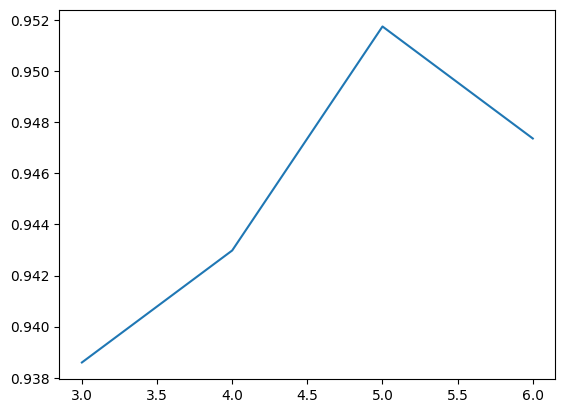

In [ ]:
plt.plot(k_range,list(scores.values()))

Observa-se que K = 5 trouxe melhores resultados

In [ ]:
k = 5
scores_final = {}

y_pred = predict(X_train, y_train, X_test, k)
scores[k] = accuracy_score(y_test, y_pred)

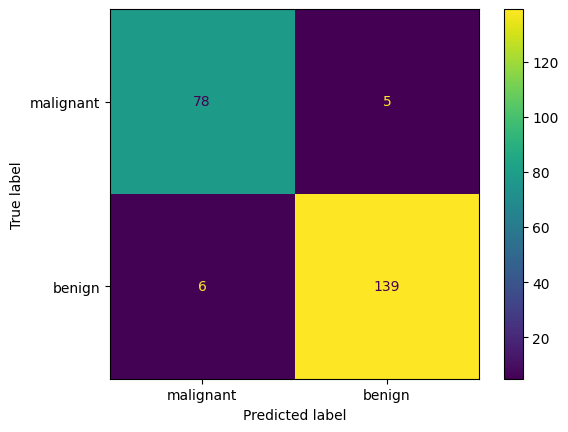

In [ ]:
# importa uma função para melhor visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(cancer.target_names))
# plota a matriz de confusão
cmd.plot()

#Métricas de avaliação do modelo

Accuracy = 216/227 = 0.95 = 95%

Error rate = 11/227 = 0,048 = 4,8%

Precision_malignant = 78/(78+6) = = 78/84  0,928 = 92,8%

Precision_bening = 139/(139+5) = 139/144 = 0,965 = 96,5%

**Recall__malignant = 78/(78+5) = 78/83 = 0,939 = 93,9%**

Recall_bening = 139/(139+6) 139/145 = 0,958 = 95,8%

**F1_escore = (2 ⨉ precision ⨉ recall) / (precision + recall)**

F1_escore_malignant = (2 x 0,928 x 0,939) / (0,928 + 0,939) = 0,933 = 93,3%

F1_escore_bening = ( 2 x 0,965 x 0,958) /  (0,965 + 0,958) = 0,96 = 96%

Os resultados acima foram aproximados. Mas podemos observar que o maior problema é o baixo Recall__malignant pois pode levar o paciente a diminuir os cuidados, Logo o 5 malignant classificados como positivos são o nosso maior problema.



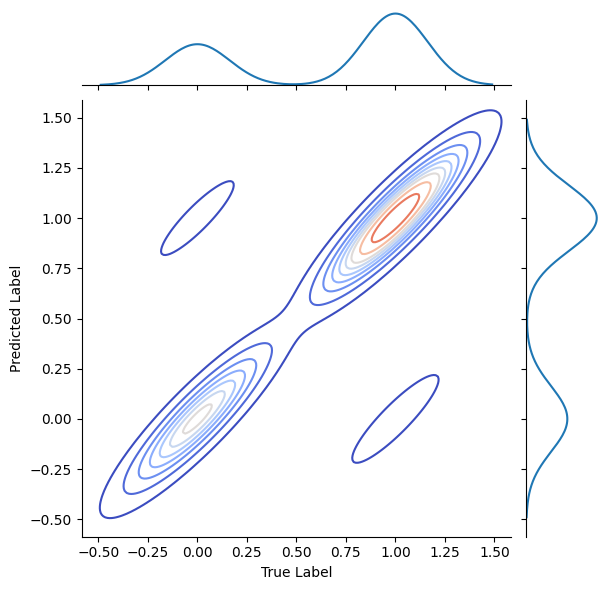

In [ ]:
import seaborn as sns

# Cria um DataFrame com os rótulos verdadeiros e as previsões do modelo
df_plot = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})

# Cria um gráfico de densidade
sns.jointplot(x='True Label', y='Predicted Label', data=df_plot, kind='kde', cmap='coolwarm')

# Exibe o gráfico
plt.show()


#Informa a variação numerica de cada feature

In [ ]:
# Definir os nomes das características manualmente
feature_names = [
    "mean radius",
    "mean texture",
    "mean perimeter",
    "mean area",
    "mean smoothness",
    "mean compactness",
    "mean concavity",
    "mean concave points",
    "mean symmetry",
    "mean fractal dimension",
    "radius error",
    "texture error",
    "perimeter error",
    "area error",
    "smoothness error",
    "compactness error",
    "concavity error",
    "concave points error",
    "symmetry error",
    "fractal dimension error",
    "worst radius",
    "worst texture",
    "worst perimeter",
    "worst area",
    "worst smoothness",
    "worst compactness",
    "worst concavity",
    "worst concave points",
    "worst symmetry",
    "worst fractal dimension"
]
min_values = X.min(axis=0)
max_values = X.max(axis=0)
contador = 1
# Exibir os valores mínimos e máximos de cada característica
for feature, min_val, max_val in zip(feature_names, min_values, max_values):
    print(f"{contador} - {feature}: Mínimo = {min_val}, Máximo = {max_val}\n")
    contador +=1


1 - mean radius: Mínimo = 6.981, Máximo = 28.11

2 - mean texture: Mínimo = 9.71, Máximo = 39.28

3 - mean perimeter: Mínimo = 43.79, Máximo = 188.5

4 - mean area: Mínimo = 143.5, Máximo = 2501.0

5 - mean smoothness: Mínimo = 0.05263, Máximo = 0.1634

6 - mean compactness: Mínimo = 0.01938, Máximo = 0.3454

7 - mean concavity: Mínimo = 0.0, Máximo = 0.4268

8 - mean concave points: Mínimo = 0.0, Máximo = 0.2012

9 - mean symmetry: Mínimo = 0.106, Máximo = 0.304

10 - mean fractal dimension: Mínimo = 0.04996, Máximo = 0.09744

11 - radius error: Mínimo = 0.1115, Máximo = 2.873

12 - texture error: Mínimo = 0.3602, Máximo = 4.885

13 - perimeter error: Mínimo = 0.757, Máximo = 21.98

14 - area error: Mínimo = 6.802, Máximo = 542.2

15 - smoothness error: Mínimo = 0.001713, Máximo = 0.03113

16 - compactness error: Mínimo = 0.002252, Máximo = 0.1354

17 - concavity error: Mínimo = 0.0, Máximo = 0.396

18 - concave points error: Mínimo = 0.0, Máximo = 0.05279

19 - symmetry error: Mínimo

#Realiza previsão para novo dado

In [ ]:
# Solicitar os valores das características ao usuário
user_input = []
contador2 = 1
for feature in range(len(X_train[0])):
    value = float(input(f"{contador2} - Insira o valor para '{feature_names[feature]}': "))
    user_input.append(value)
    contador2 +=1
# Converter a entrada do usuário em um array numpy
user_input = np.array(user_input).reshape(1, -1)

# Definir o valor de k (número de vizinhos mais próximos)
k = 5

# Fazer a previsão com base na entrada do usuário
prediction = predict(X_train, y_train, user_input, k)

# Exibir a previsão
if prediction[0] == 0:
    print("O modelo previu que o tumor é benigno (B).")
else:
    print("O modelo previu que o tumor é maligno (M).")

1 - Insira o valor para 'mean radius': 7
2 - Insira o valor para 'mean texture': 50.5
3 - Insira o valor para 'mean perimeter': 153
4 - Insira o valor para 'mean area': 500.1
5 - Insira o valor para 'mean smoothness': 0.2
6 - Insira o valor para 'mean compactness': 0.05
7 - Insira o valor para 'mean concavity': 0.02
8 - Insira o valor para 'mean concave points': 0
9 - Insira o valor para 'mean symmetry': 0.2
10 - Insira o valor para 'mean fractal dimension': 0.05
11 - Insira o valor para 'radius error': 0.12
12 - Insira o valor para 'texture error': 0.4
13 - Insira o valor para 'perimeter error': 7.5
14 - Insira o valor para 'area error': 7
15 - Insira o valor para 'smoothness error': 0.0002
16 - Insira o valor para 'compactness error': 0.01
17 - Insira o valor para 'concavity error': 0.03
18 - Insira o valor para 'concave points error': 0
19 - Insira o valor para 'symmetry error': 0.009
20 - Insira o valor para 'fractal dimension error': 0.0001
21 - Insira o valor para 'worst radius':